In [ ]:
!pip install scanpy
!pip install decoupler
!pip install liana

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=0c95c48215aaa1f183513b243e0ffc90a242a2520533bf5643a8b46584d871a6
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.8 MB/s eta 

In [ ]:
# python libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import liana as li
import decoupler as dc

import session_info

In [ ]:
# Read in
adata = sc.read(
    "kang_counts_25k.h5ad", backup_url="https://figshare.com/ndownloader/files/34464122"
)
adata

# Store the counts for later use
adata.layers["counts"] = adata.X.copy()

  0%|          | 0.00/36.6M [00:00<?, ?B/s]

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
# Store the counts for later use
adata.layers["counts"] = adata.X.copy()
# Rename label to condition, replicate to patient
adata.obs = adata.obs.rename({"label": "condition", "replicate": "patient"}, axis=1)
# assign sample
adata.obs["sample"] = (
    adata.obs["condition"].astype("str") + "&" + adata.obs["patient"].astype("str")
)

In [ ]:
# log1p normalize the data
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [ ]:
adata.obs["cell_type"].cat.categories

Index(['CD4 T cells', 'CD14+ Monocytes', 'B cells', 'NK cells', 'CD8 T cells',
       'FCGR3A+ Monocytes', 'Dendritic cells', 'Megakaryocytes'],
      dtype='object')

In [ ]:
adata_stim = adata[adata.obs["condition"] == "stim"].copy()
adata_stim

AnnData object with n_obs × n_vars = 12301 × 15701
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'condition', 'cluster', 'cell_type', 'patient', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters', 'n_genes', 'sample'
    var: 'name', 'n_cells'
    uns: 'log1p'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [ ]:
# import cellphonedb method via liana
from liana.method import cellphonedb

In [ ]:
cellphonedb(
    adata_stim, groupby="cell_type", use_raw=False, return_all_lrs=True, verbose=True
)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/usr/local/lib/python3.10/dist-packages/liana/method/_pipe_utils/_pre.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/usr/local/lib/python3.10/dist-packages/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


Generating ligand-receptor stats for 12301 samples and 892 features


/usr/local/lib/python3.10/dist-packages/liana/resource/_reassemble_complexes.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/usr/local/lib/python3.10/dist-packages/liana/resource/_reassemble_complexes.py:56: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/usr/local/lib/python3.10/dist-packages/liana/resource/_

In [ ]:
adata_stim.uns["liana_res"].head()

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lrs_to_keep,lr_means,cellphone_pvals
42936,B2M,B2M,4.431647,1.0,KLRD1,KLRD1,0.591819,0.537747,CD8 T cells,NK cells,True,2.511733,0.0
41412,B2M,B2M,4.359549,1.0,KLRD1,KLRD1,0.591819,0.537747,NK cells,NK cells,True,2.475684,0.0
55128,B2M,B2M,4.431647,1.0,KLRD1,KLRD1,0.419571,0.406173,CD8 T cells,CD8 T cells,True,2.425609,0.0
53604,B2M,B2M,4.359549,1.0,KLRD1,KLRD1,0.419571,0.406173,NK cells,CD8 T cells,True,2.389560,0.0
42931,B2M,B2M,4.431647,1.0,KLRC1,KLRC1,0.274590,0.271777,CD8 T cells,NK cells,True,2.353119,0.0


/usr/local/lib/python3.10/dist-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


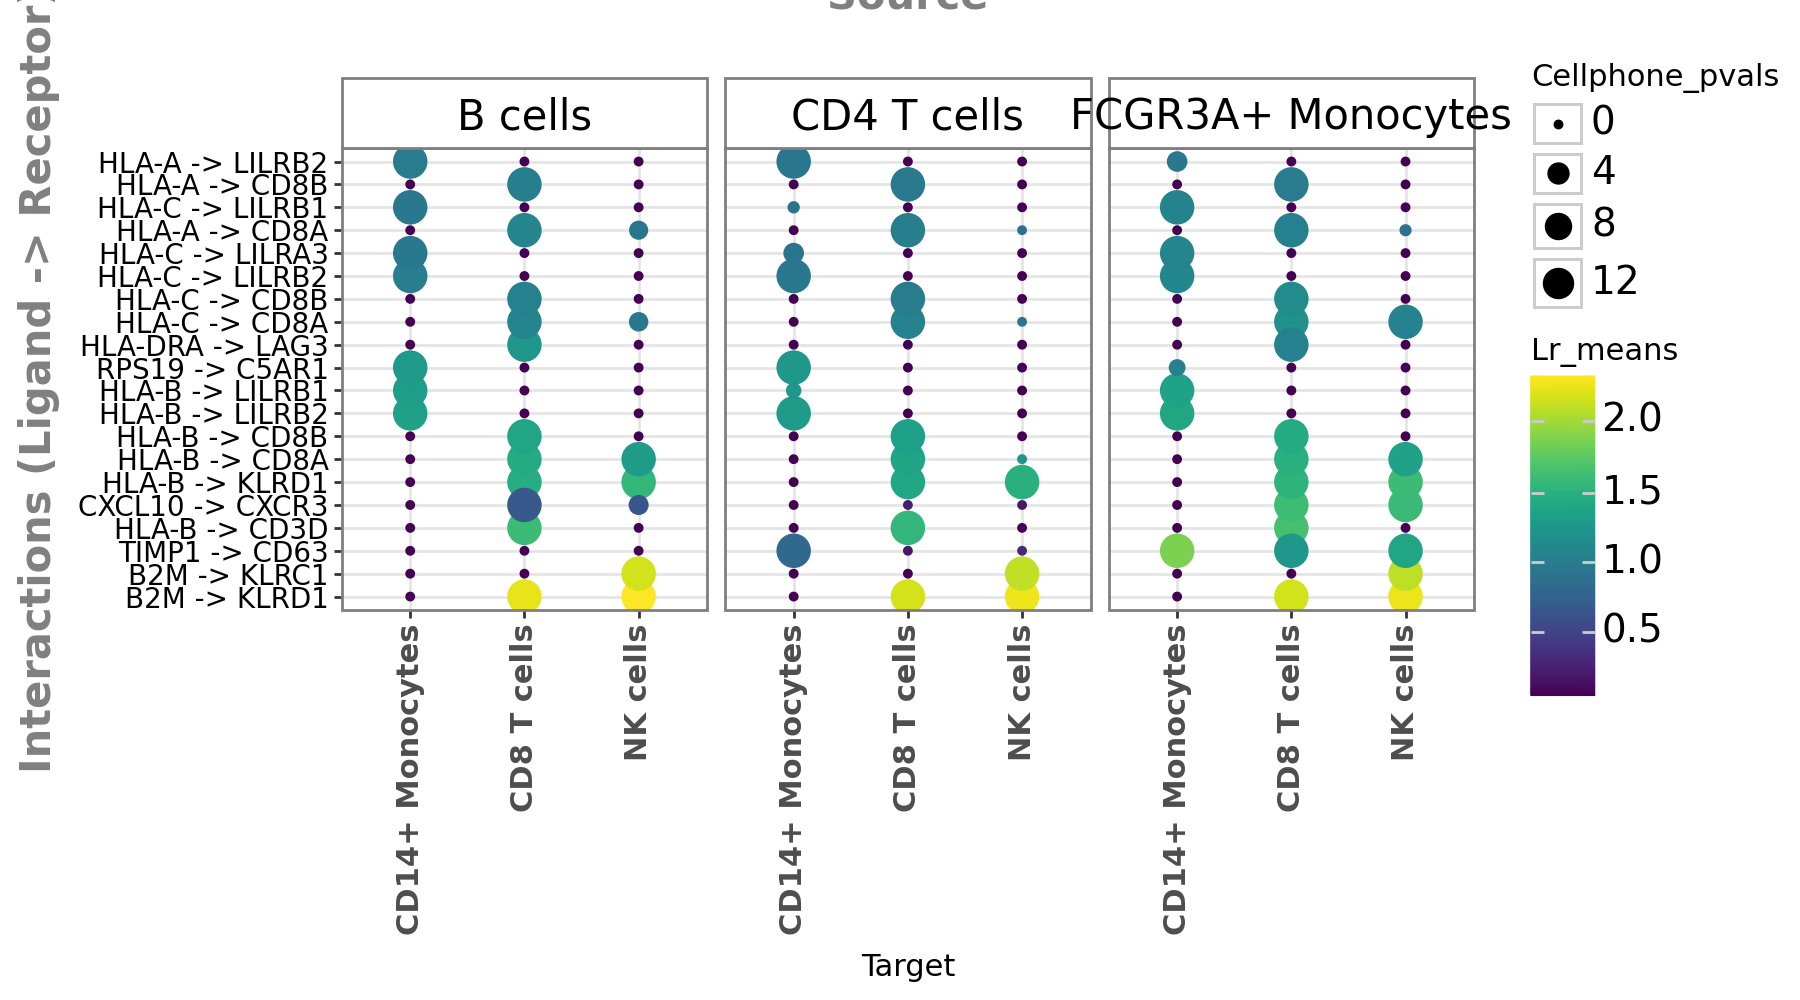

In [ ]:
li.pl.dotplot(
    adata=adata_stim,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size=True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=["CD4 T cells", "B cells", "FCGR3A+ Monocytes"],
    target_labels=["CD8 T cells", "CD14+ Monocytes", "NK cells"],

    orderby="lr_means",
    orderby_ascending=False,  # we want to prioritize those with highest expression
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(9, 5),
    size_range=(1, 6),
)